### MACHINE LEARNING (ML) INNOVATIVE ASSIGNMENT

### COURSE CODE : 2CS501

### CUSTOMER CHURN PREDICTION

### 21BCE006 ACHARYA VARAD
### 21BCE081 HALPATI SAHIL
### 22BCE501 VISHAL ARYA
### 22BCE508 PRATHAM GUPTA

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [40]:
# Customer Churn Prediction 
df = pd.read_csv('Churn_Modelling.csv')

In [41]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df.shape

(10000, 14)

In [43]:
# Delete RowNumber Customer Id , Surname
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [44]:
df.info()
# there is no null value in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [45]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [47]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [48]:
# One hot encoding in the category data - geography and gender
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [49]:
df.head()
# the estimated salary and balance has large values 
# so we are going to scale this 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [50]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaling the x_test and x_traing
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

X_train = X_train.astype(np.float32)  # Convert to float32
y_train = y_train.astype(np.float32)  # Convert to float32
X_test = X_test.astype(np.float32)  # Convert to float32
y_test = y_test.astype(np.float32)  # Convert to float32


### 1.GREDIENT DECENT CLASSIFFIER


In [52]:
# Import Necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')  # Replace 'your_dataset.csv' with your file's name

# Split features and target
X = data.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = data['Exited']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical columns (change the list below with the actual categorical columns)
categorical_cols = ['Geography', 'Gender']

# Define the preprocessing steps
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])
"""OneHotEncoder(): OneHotEncoder is a transformer in scikit-learn used for converting categorical (text or discrete) data 
into one-hot encoded numerical features. One-hot encoding is a process of converting categorical variables into binary 
vectors (0 and 1) to make them suitable for machine learning algorithms. Each category is transformed into a binary vector 
where all elements are 0 except for the index that represents the category, which is marked as 1.
The Pipeline class in scikit-learn is a way to simplify the process of building a sequence of data transformations. 
In this case, the Pipeline consists of a single step: onehot': This is a name given to the step. It's a string that identifies
the step in the pipeline.OneHotEncoder(): This is the transformer that will be applied to the data. It's responsible for 
transforming categorical data into one-hot encoded numerical features.When you create this pipeline and later use it to 
transform your data, you can pass your raw categorical data to the categorical_transformer, and it will automatically apply 
the OneHotEncoder transformation to it. Pipelines are useful because they encapsulate multiple steps into a single object,
making it easier to manage and apply transformations consistently across different datasets."""

preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_cols)],remainder='passthrough')
"""categorical_transformer: This is a Pipeline object that you defined earlier. It consists of a series of data transformation
steps, specifically designed for processing categorical data using one-hot encoding.
categorical_cols: This is likely a list of column names or indices in your dataset that represent the categorical features. 
categorical_cols specifies which columns in your dataset should be processed using the categorical_transformer pipeline.

ColumnTransformer: ColumnTransformer is a class in scikit-learn that allows you to apply different transformers to different 
columns of your input data, and concatenate the results into a single feature space. It is particularly useful when dealing 
with datasets where different columns require different preprocessing steps.

transformers=[('cat', categorical_transformer, categorical_cols)]: This parameter of ColumnTransformer takes a list of tuples, 
where each tuple contains three elements:
'cat': A string representing the name of the transformer. This is used to identify the transformer in the transformed dataset.
categorical_transformer: The transformer object (in this case, the Pipeline for one-hot encoding) that will be applied to the 
specified columns.
categorical_cols: The list of column indices or names that will be processed by the categorical_transformer.
remainder='passthrough': This parameter specifies what to do with the columns that are not specified in the transformers. 
'passthrough' means that these columns will not be transformed and will be included in the output unchanged.

When you apply this ColumnTransformer to your dataset, it will process the specified categorical columns using the 
categorical_transformer (which applies one-hot encoding) and leave other columns unchanged ('passthrough'). 
The result will be a transformed dataset where categorical columns are one-hot encoded, and other columns remain the same. 
This is a powerful tool for preprocessing datasets with multiple types of features that require different transformations."""

# Define the model and preprocess data
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss='log', max_iter=1000, random_state=42))
])
"""preprocessor: This is a ColumnTransformer object, as explained in the previous response. It's responsible for preprocessing 
the input data, including applying one-hot encoding to categorical features and leaving other columns unchanged ('passthrough').

StandardScaler(): StandardScaler is a transformer in scikit-learn used for standardizing features by removing the mean and 
scaling to unit variance. This step is crucial in many machine learning algorithms to ensure that all features have the same 
scale. It's applied after the preprocessing step.

SGDClassifier(loss='log', max_iter=1000, random_state=42): This is a linear classifier called Stochastic Gradient Descent (SGD)
Classifier. It's a type of gradient descent algorithm used for training machine learning models. In this case, it's configured 
to use the logistic loss function ('log') which makes it suitable for binary classification problems (where you have two classes)
.max_iter specifies the maximum number of epochs, and random_state is set for reproducibility, ensuring that the same random 
initialization is used every time the model is trained.

Pipeline(steps=[('preprocessor', preprocessor), ('scaler', StandardScaler()), ('classifier', SGDClassifier(...))]): 
This line creates a Pipeline object that chains together multiple steps. Each step is specified as a tuple where the first 
element is a string identifier for the step, and the second element is the corresponding transformer or estimator.

'preprocessor': The preprocessor step applies the column transformation (including one-hot encoding) to the input data.
'scaler': The StandardScaler step standardizes the features after preprocessing.
'classifier': The SGDClassifier step is the final step, which applies the logistic regression model to the processed and scaled features.
When you use this Pipeline to train and evaluate your model, you can pass raw input data to the pipeline, and it will 
automatically handle all the necessary preprocessing, scaling, and classification steps in the specified order. Pipelines are 
convenient for encapsulating multiple processing steps into a single object, making it easier to manage and apply the same 
transformations consistently during training and prediction."""

# Fit the model
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8115


C:\Users\vishal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


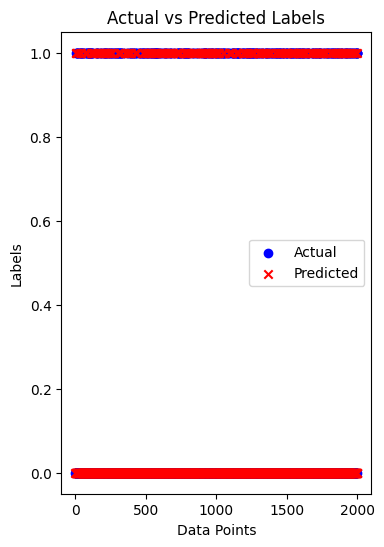

In [53]:
# Importing Required Libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted and actual labels to numpy arrays for plotting
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

# Plot the actual vs predicted labels
plt.figure(figsize=(4, 6))
plt.scatter(np.arange(len(y_test)), y_test_np, c='blue', marker='o', label='Actual')
plt.scatter(np.arange(len(y_test)), y_pred_np, c='red', marker='x', label='Predicted')
plt.title('Actual vs Predicted Labels')
plt.xlabel('Data Points')
plt.ylabel('Labels')
plt.legend()
plt.show()


# 2.LOGISTIC REGRESSION 

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame named 'data' with features and target columns

# Extract the features and target
X = data.drop(columns=['Exited'])  # Features
y = data['Exited']  # Target

# Get categorical columns and perform one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)


Accuracy: 0.8035


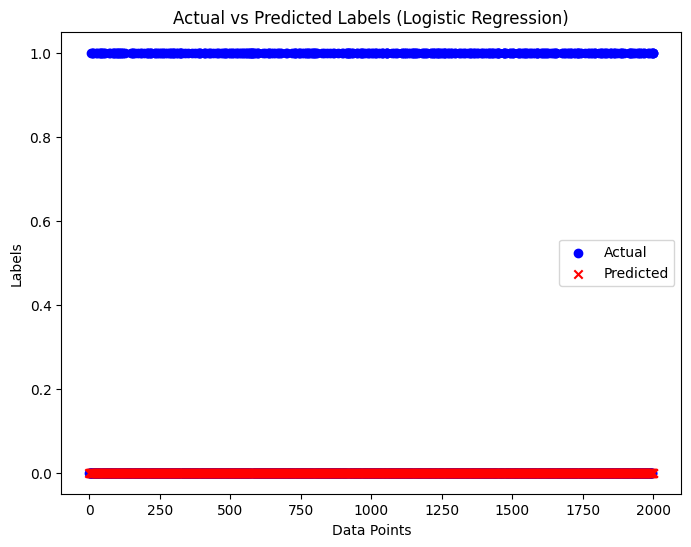

In [55]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot actual vs predicted labels
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, c='blue', marker='o', label='Actual')
plt.scatter(range(len(y_test)), y_pred, c='red', marker='x', label='Predicted')
plt.title('Actual vs Predicted Labels (Logistic Regression)')
plt.xlabel('Data Points')
plt.ylabel('Labels')
plt.legend()
plt.show()


# 3.Back propagation algorithm

In [63]:
# Customer Churn Prediction 
df = pd.read_csv('Churn_Modelling.csv')
# Delete RowNumber Customer Id , Surname
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
# One hot encoding in the category data - geography and gender
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaling the x_test and x_traing
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

X_train = X_train.astype(np.float32)  # Convert to float32
y_train = y_train.astype(np.float32)  # Convert to float32
X_test = X_test.astype(np.float32)  # Convert to float32
y_test = y_test.astype(np.float32)  # Convert to float32

In [64]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [65]:
import tensorflow as tf
import numpy as np

# Assuming 'numpy_array' is your NumPy array
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)  # Adjust dtype if needed
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)  # Adjust dtype if needed
X_test = tf.convert_to_tensor(X_train, dtype=tf.float32)  # Adjust dtype if needed
y_test = tf.convert_to_tensor(y_train, dtype=tf.float32)  # Adjust dtype if needed


In [66]:
model = Sequential()
# the model has 3 layers 
# 1. Input layer
# 2. Hidden layer
# 3.Output layer
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 11)                132       
                                                                 
 dense_16 (Dense)            (None, 11)                132       
                                                                 
 dense_17 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 3s 9ms/step - loss: 0.5764 - accuracy: 0.7606 - val_loss: 0.5091 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5041 - accuracy: 0.7958 - val_loss: 0.4993 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5015 - accuracy: 0.7958 - val_loss: 0.4982 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5010 - accuracy: 0.7958 - val_loss: 0.4976 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5005 - accuracy: 0.7958 - val_loss: 0.4971 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5012 - accuracy: 0.7958 - val_loss: 0.4973 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5004 - accuracy: 0.7958 - val_loss: 0.4961 - val_accuracy: 0.7969

Epoch 58/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4998 - accuracy: 0.7958 - val_loss: 0.4956 - val_accuracy: 0.7969
Epoch 59/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4997 - accuracy: 0.7958 - val_loss: 0.4956 - val_accuracy: 0.7969
Epoch 60/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4997 - accuracy: 0.7958 - val_loss: 0.4955 - val_accuracy: 0.7969
Epoch 61/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4996 - accuracy: 0.7958 - val_loss: 0.4955 - val_accuracy: 0.7969
Epoch 62/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4991 - accuracy: 0.7958 - val_loss: 0.4969 - val_accuracy: 0.7969
Epoch 63/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5002 - accuracy: 0.7958 - val_loss: 0.4956 - val_accuracy: 0.7969
Epoch 64/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4997 - accuracy: 0.7958 - val_loss: 0.4955 - val_accuracy:

In [70]:
model.layers[0].get_weights()

[array([[ 0.4227575 ,  0.2789843 ,  0.00927129,  0.07537018,  0.04231213,
         -0.01122192, -0.40946084,  0.35397756, -0.01484573, -0.00331532,
          0.158535  ],
        [ 0.01650542,  0.4713949 , -0.29189035,  0.38013282,  0.46381077,
         -0.08376031,  0.10474056, -0.24746308,  0.30551428, -0.2349159 ,
         -0.49321613],
        [-0.07480079,  0.51162535, -0.39453092,  0.48055705,  0.08702226,
          0.03397112, -0.10668805, -0.34828508, -0.36117077, -0.03291122,
         -0.43731698],
        [ 0.27840132,  0.20757306,  0.27598447, -0.3351086 ,  0.00965391,
          0.00516989, -0.3889233 ,  0.5065561 ,  0.25744158, -0.38342187,
          0.46685648],
        [ 0.28999943, -0.22807476, -0.54945654,  0.11679339,  0.66746724,
          0.17709449,  0.5082862 ,  0.3994851 ,  0.02293599, -0.1012206 ,
          0.00747895],
        [ 0.20325345, -0.02423689, -0.49174196,  0.29294387, -0.09315012,
          0.35760322,  0.43129665,  0.18941814, -0.10057697,  0.3304358

In [71]:
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix

250/250 [==============================] - 1s 2ms/step


In [72]:
y_pred=[1 if  i > 0.5  else 0     for i in y_pred ]
print(confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred))

[[6368    0]
 [1632    0]] 0.796


In [73]:
y_logs=model.predict(X_test)
y_logs=np.where(y_logs>0.5,1,0)
print(confusion_matrix(y_test,y_logs),accuracy_score(y_logs,y_test))

250/250 [==============================] - 1s 2ms/step
[[6368    0]
 [1632    0]] 0.796


In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.796

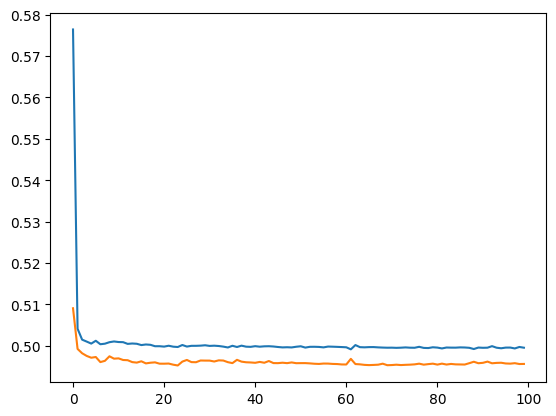

In [75]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [76]:
# Assuming 'model' is the variable that holds your trained model
model.save('my_model.h5')


C:\Users\vishal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [77]:
import pickle

In [78]:
pickle.dump(df, open('customer_churn.pkl','wb'))

In [79]:
with open('ann_model.pkl', 'wb') as file:
    pickle.dump(model, file)